# Procesamiento de datos

En este archivo se verifica que los datos tomados en campo sean consistentes con las imagenes tomadas en campo.

## Importaciones necesarias

In [14]:
import shutil
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, HTML
from config import CONFIG
from pathlib import Path

## Paths necesarios

In [15]:
excel_path=Path(CONFIG["EXEL_PATH"])
coordenadas_path=Path(CONFIG["COORDENADAS_PATH"])

processed_data_pickle_path=Path(CONFIG["PROCESSED_DATA_PICKLE_PATH"])
processed_data_excel=Path(CONFIG["PROCESSED_DATA_EXCEL"])
images_renamed_by_date_dir=Path(CONFIG["IMAGES_RENAMED_BY_DATE_DIR"])
images_processed_dir=Path(CONFIG["IMAGES_PROCESSED_DIR"])

## Importación de los datos

### Importación de los datos de campo

In [16]:
df=pd.read_excel(excel_path,dtype=str,keep_default_na=False)

In [17]:
df["id"] = pd.to_numeric(df["id"], errors="coerce").astype("Int64")

# df["m"]  = pd.to_numeric(df["m"], errors="coerce").astype("Int64")

### Importación de las coordenadas del gps

In [18]:
df_gps=pd.read_excel(coordenadas_path,dtype=str,keep_default_na=False)

In [19]:
df_gps["x"] = pd.to_numeric(df_gps["x"], errors="coerce").astype("Int64")
df_gps["y"] = pd.to_numeric(df_gps["y"], errors="coerce").astype("Int64")
df_gps["zona_number"] = pd.to_numeric(df_gps["zona_number"], errors="coerce").astype("Int64")

In [20]:
df_gps.head()

,x,y,zona_number,zona_letter
0,189967,8229889,19,l
1,189968,8229891,19,l
2,190139,8227888,19,l
3,190105,8227713,19,l
4,190092,8227457,19,l


Conviertiendo el campo fotos-number y fotos-gps de string a listas

In [21]:
def convertir_a_lista(cadena):
    # Si el valor es NaN, None o cadena vacía, retornamos lista vacía
    if pd.isnull(cadena) or cadena.strip() == '':
        return []
    # Dividimos por '-' y convertimos cada elemento a int si corresponde
    return [int(x) for x in cadena.split('-') if x.isdigit()]

# Aplicamos la función a ambas columnas
df['foto-number'] = df['foto-number'].apply(convertir_a_lista)
df['foto-gps']    = df['foto-gps'].apply(convertir_a_lista)

In [22]:
df.head(10)

,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete
0,1,,fin,,,,u,[1],[],,,
1,2,,alcantarilla,,,,u,"[2, 3, 4]",[5],,,
2,3,,baden,,,,u,[6],[7],,,foto 7 repetida
3,4,,alcantarilla,,,,u,"[7, 8, 9]",[10],,,
4,5,,alcantarilla,,,,u,"[11, 12]",[13],,,
5,6,a,señal de baden,,,,o,[14],[15],,,
6,7,,baden,,,,u,[16],[17],,,
7,8,a,señal de baden,,,,i,[18],[19],,,
8,9,a,curva,,,,o,[20],[21],,,
9,10,,alcantarilla,,,,u,"[22, 23, 24]",[25],,,


## Edición manual de datos

Se van a editar los registros

### El indice 7 de fotos esta repetida, hay que cambiarlo

In [23]:
# Asignar la foto-gps = [2] al primer registro
df.at[0, 'foto-gps'] = [2]

# Incrementar en 1 los valores de 'foto-number' y 'foto-gps' en las filas siguientes
for i in range(1, len(df)):
    df.at[i, 'foto-number'] = [x + 1 for x in df.at[i, 'foto-number']]
    df.at[i, 'foto-gps']    = [x + 1 for x in df.at[i, 'foto-gps']]

In [24]:
df.head(10)

,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete
0,1,,fin,,,,u,[1],[2],,,
1,2,,alcantarilla,,,,u,"[3, 4, 5]",[6],,,
2,3,,baden,,,,u,[7],[8],,,foto 7 repetida
3,4,,alcantarilla,,,,u,"[8, 9, 10]",[11],,,
4,5,,alcantarilla,,,,u,"[12, 13]",[14],,,
5,6,a,señal de baden,,,,o,[15],[16],,,
6,7,,baden,,,,u,[17],[18],,,
7,8,a,señal de baden,,,,i,[19],[20],,,
8,9,a,curva,,,,o,[21],[22],,,
9,10,,alcantarilla,,,,u,"[23, 24, 25]",[26],,,


La foto numero 8 esta repetida, hay que hacer saltar uno

In [25]:
# 1) Creamos una máscara para filtrar los registros desde id=4 en adelante
mask = df['id'] >= 4

# 2) A todos los registros que cumplan la máscara, les incrementamos en +1 
#    cada valor de foto-number y foto-gps.
df.loc[mask, 'foto-number'] = df.loc[mask, 'foto-number'].apply(
    lambda lista_fotos: [x + 1 for x in lista_fotos]
)
df.loc[mask, 'foto-gps'] = df.loc[mask, 'foto-gps'].apply(
    lambda lista_fotos: [x + 1 for x in lista_fotos]
)

In [26]:
df.head(10)

,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete
0,1,,fin,,,,u,[1],[2],,,
1,2,,alcantarilla,,,,u,"[3, 4, 5]",[6],,,
2,3,,baden,,,,u,[7],[8],,,foto 7 repetida
3,4,,alcantarilla,,,,u,"[9, 10, 11]",[12],,,
4,5,,alcantarilla,,,,u,"[13, 14]",[15],,,
5,6,a,señal de baden,,,,o,[16],[17],,,
6,7,,baden,,,,u,[18],[19],,,
7,8,a,señal de baden,,,,i,[20],[21],,,
8,9,a,curva,,,,o,[22],[23],,,
9,10,,alcantarilla,,,,u,"[24, 25, 26]",[27],,,


Existe un error similar en la foto 70

In [27]:
df.iloc[20:30]

,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete
20,21,,curva y contracurva pronunciada,,,,,[58],[59],deterioro severo,señal borrada,
21,22,,alcantarilla,,,,u,"[60, 61, 62]",[63],,,
22,23,,alcantarilla,,,,u,"[64, 65]",[66],,,
23,24,,alcantarilla,,,,u,"[67, 68, 69]",[70],,,
24,25,,curva en u,,,,o,[71],[72],,,
25,26,,alcantarilla,,,,u,"[72, 73]",[74],,,foto 70 repetida
26,27,,curva en u,,,,i,[75],[76],,,
27,28,,curva y contracurva pronunciada,,,,i,[77],[78],,,
28,29,,curva en u,,,,o,[79],[80],,,
29,30,,curva en u,,,,o,[81],[82],,,


In [28]:
# 1) Creamos una máscara para filtrar los registros desde id=4 en adelante
mask = df['id'] >= 26
# 2) A todos los registros que cumplan la máscara, les incrementamos en +1 
#    cada valor de foto-number y foto-gps.
df.loc[mask, 'foto-number'] = df.loc[mask, 'foto-number'].apply(
    lambda lista_fotos: [x + 1 for x in lista_fotos]
)
df.loc[mask, 'foto-gps'] = df.loc[mask, 'foto-gps'].apply(
    lambda lista_fotos: [x + 1 for x in lista_fotos]
)

In [29]:
df.iloc[20:30]

,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete
20,21,,curva y contracurva pronunciada,,,,,[58],[59],deterioro severo,señal borrada,
21,22,,alcantarilla,,,,u,"[60, 61, 62]",[63],,,
22,23,,alcantarilla,,,,u,"[64, 65]",[66],,,
23,24,,alcantarilla,,,,u,"[67, 68, 69]",[70],,,
24,25,,curva en u,,,,o,[71],[72],,,
25,26,,alcantarilla,,,,u,"[73, 74]",[75],,,foto 70 repetida
26,27,,curva en u,,,,i,[76],[77],,,
27,28,,curva y contracurva pronunciada,,,,i,[78],[79],,,
28,29,,curva en u,,,,o,[80],[81],,,
29,30,,curva en u,,,,o,[82],[83],,,


In [30]:
df.tail()

,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete
30,31,,curva en u,,,,i,[84],[85],,,
31,32,,alcantarilla,,,,u,"[86, 87, 88]",[89],,,
32,33,,curva y contracurva pronunciada,,,,i,[90],[91],,,
33,34,,cruce de ganado,,,,i,[91],[93],,,
34,35,,inicio,,,,,[94],[95],,,


eliminamos el registro con el id 17

In [31]:
def remove_record_and_shift(df, id_to_remove):
    """
    Elimina el registro con id == id_to_remove y
    'desplaza' la numeración de fotos de los registros siguientes.
    Retorna un nuevo DataFrame con las correcciones aplicadas.
    """
    
    # 1) Hallar la(s) fila(s) que coincidan con el id a eliminar
    row_index = df.index[df['id'] == id_to_remove]
    if len(row_index) == 0:
        print(f"No se encontró ningún registro con id={id_to_remove}.")
        return df  # No hay cambios
    
    # 2) Calcular cuántas fotos tenía ese registro (suma de ambas columnas)
    idx = row_index[0]  # Tomamos la primera coincidencia
    fotos_en_registro = len(df.at[idx, 'foto-number']) + len(df.at[idx, 'foto-gps'])
    
    # 3) Eliminar ese registro
    df = df.drop(idx)
    
    # 4) 'Desplazar' la numeración de las fotos en los registros con id > id_to_remove
    mask = df['id'] > id_to_remove
    
    # Para cada lista de foto-number y foto-gps en filas posteriores, restar fotos_en_registro
    df.loc[mask, 'foto-number'] = df.loc[mask, 'foto-number'].apply(
        lambda lista_fotos: [num - fotos_en_registro for num in lista_fotos]
    )
    df.loc[mask, 'foto-gps'] = df.loc[mask, 'foto-gps'].apply(
        lambda lista_fotos: [num - fotos_en_registro for num in lista_fotos]
    )
    
    return df


In [32]:
df = remove_record_and_shift(df, 31)

Renombrando el registro 17

In [33]:
df.loc[df['id'] == 17, 'descripcion'] = 'señal de puente angosto'

El registro numero dice que tiene 3 fotos, pero en realidad se tomaron solo 2 en campo

In [34]:
def ajustar_fotos_registro(*, id, fotos_dataframe, fotos_reales, df):
    """
    Corrige la numeración de fotos de un registro específico y ajusta los
    registros siguientes en el DataFrame.
    
    Parámetros:
      - id: Identificador del registro a corregir (columna 'id').
      - fotos_dataframe: Número de fotos (enteros consecutivos) que figura en 'foto-number'
                         para ese registro.
      - fotos_reales: Número real de fotos que se tomaron en campo para ese registro.
      - df: DataFrame de pandas que contiene la información.
    
    La función ajusta:
      - La lista en 'foto-number' del registro: si hay de más se elimina de la derecha;
        si hay de menos se añaden números consecutivos.
      - La lista en 'foto-gps' del registro: se le resta la diferencia.
      - En todos los registros con 'id' mayor, se ajusta la numeración (se restan o suman la diferencia)
        en ambas columnas ('foto-number' y 'foto-gps').
    
    Retorna el DataFrame modificado.
    """
    # Buscar la fila correspondiente al registro con el id indicado
    indices = df.index[df['id'] == id].tolist()
    if not indices:
        print(f"No se encontró ningún registro con id={id}.")
        return df  # Sin cambios si no se encuentra
    idx = indices[0]
    
    # Calcular la diferencia: (número según DataFrame) - (número real tomado en campo)
    diferencia = fotos_dataframe - fotos_reales
    
    # Ajustar la columna 'foto-number' del registro
    lista_actual = df.at[idx, 'foto-number']  # se asume que es una lista de enteros
    if diferencia > 0:
        # Si hay de más, eliminamos de la derecha (se asume que son consecutivos)
        nueva_lista = lista_actual[:fotos_reales]
    elif diferencia < 0:
        # Si hay de menos, agregamos números consecutivos al final
        if lista_actual:
            ultimo = lista_actual[-1]
        else:
            # En caso de lista vacía, asumimos inicio arbitrario (por ejemplo 1)
            ultimo = 0
        # Agregar tantos números consecutivos como haga falta
        nuevos_numeros = list(range(ultimo + 1, ultimo + 1 + abs(diferencia)))
        nueva_lista = lista_actual + nuevos_numeros
    else:
        # Sin diferencia: no se cambia nada
        nueva_lista = lista_actual
    # Actualizamos el registro
    df.at[idx, 'foto-number'] = nueva_lista
    
    # Ajustar el campo 'foto-gps' del registro, restándole la diferencia a cada número
    lista_gps = df.at[idx, 'foto-gps']
    df.at[idx, 'foto-gps'] = [num - diferencia for num in lista_gps]
    
    # Ahora, para todos los registros con id mayor al del registro corregido, ajustar ambas columnas.
    mask = df['id'] > id
    df.loc[mask, 'foto-number'] = df.loc[mask, 'foto-number'].apply(
        lambda lst: [num - diferencia for num in lst]
    )
    df.loc[mask, 'foto-gps'] = df.loc[mask, 'foto-gps'].apply(
        lambda lst: [num - diferencia for num in lst]
    )
    
    return df


In [35]:
df = ajustar_fotos_registro(id=24, fotos_dataframe=3, fotos_reales=2, df=df)

Visualizamos toda la data:

In [36]:
html = df.to_html()
display(HTML(html))


,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete
0,1,,fin,,,,u,[1],[2],,,
1,2,,alcantarilla,,,,u,"[3, 4, 5]",[6],,,
2,3,,baden,,,,u,[7],[8],,,foto 7 repetida
3,4,,alcantarilla,,,,u,"[9, 10, 11]",[12],,,
4,5,,alcantarilla,,,,u,"[13, 14]",[15],,,
5,6,a,señal de baden,,,,o,[16],[17],,,
6,7,,baden,,,,u,[18],[19],,,
7,8,a,señal de baden,,,,i,[20],[21],,,
8,9,a,curva,,,,o,[22],[23],,,
9,10,,alcantarilla,,,,u,"[24, 25, 26]",[27],,,


Esta función copia las imagenes y elimina las que no son requeridas

In [37]:
def copiar_imagenes(origen, destino, excluir):
    """
    Copia imágenes de la carpeta 'origen' a la carpeta 'destino' ignorando aquellas cuyo nombre numérico (sin extensión)
    se encuentre en la lista 'excluir'. Las imágenes copiadas se renombrarán consecutivamente a partir de 1.
    
    Parámetros:
        origen (str): ruta de la carpeta de origen.
        destino (str): ruta de la carpeta de destino.
        excluir (list of int): lista de números a excluir.
    """
    # Verificar si el directorio de destino existe, si no, lo crea.
    if not os.path.exists(destino):
        os.makedirs(destino)
        print(f"Directorio destino creado: {destino}")

    # Definir las extensiones de imagen a copiar.
    extensiones = ('*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp', '*.tiff')
    
    # Recopilar todos los archivos de imagen de las extensiones indicadas.
    imagenes = []
    for ext in extensiones:
        imagenes.extend(glob.glob(os.path.join(origen, ext)))
    
    # Filtrar y ordenar las imágenes por el número que tienen en su nombre.
    imagenes_filtradas = []
    for ruta_imagen in imagenes:
        nombre_archivo = os.path.basename(ruta_imagen)
        nombre, extension = os.path.splitext(nombre_archivo)
        try:
            numero = int(nombre)
            if numero in excluir:
                print(f"Excluyendo imagen: {nombre_archivo}")
            else:
                imagenes_filtradas.append((numero, ruta_imagen, extension))
        except ValueError:
            print(f"El archivo {nombre_archivo} no tiene un nombre numérico y será ignorado.")
    
    # Ordena las imágenes filtradas según el número original.
    imagenes_filtradas.sort(key=lambda x: x[0])
    
    # Copia las imágenes y las renombra de forma consecutiva.
    contador = 0
    for numero_original, ruta_imagen, extension in imagenes_filtradas:
        contador += 1
        nuevo_nombre = f"{contador}{extension}"
        destino_imagen = os.path.join(destino, nuevo_nombre)
        try:
            shutil.copy(ruta_imagen, destino_imagen)
            print(f"Copiado: {ruta_imagen} como {destino_imagen}")
        except Exception as e:
            print(f"Error al copiar {ruta_imagen}: {e}")
    
    print(f"Total de imágenes copiadas: {contador}")

# Ejemplo de uso:
ruta_origen = images_renamed_by_date_dir
ruta_destino = images_processed_dir
excluir = [3]

copiar_imagenes(ruta_origen, ruta_destino, excluir)

Excluyendo imagen: 3.jpg
Copiado: tmp\images\100_images_renamed_by_date\1.jpg como tmp\images\200_images_processed\1.jpg
Copiado: tmp\images\100_images_renamed_by_date\2.jpg como tmp\images\200_images_processed\2.jpg
Copiado: tmp\images\100_images_renamed_by_date\4.jpg como tmp\images\200_images_processed\3.jpg
Copiado: tmp\images\100_images_renamed_by_date\5.jpg como tmp\images\200_images_processed\4.jpg
Copiado: tmp\images\100_images_renamed_by_date\6.jpg como tmp\images\200_images_processed\5.jpg
Copiado: tmp\images\100_images_renamed_by_date\7.jpg como tmp\images\200_images_processed\6.jpg
Copiado: tmp\images\100_images_renamed_by_date\8.jpg como tmp\images\200_images_processed\7.jpg
Copiado: tmp\images\100_images_renamed_by_date\9.jpg como tmp\images\200_images_processed\8.jpg
Copiado: tmp\images\100_images_renamed_by_date\10.jpg como tmp\images\200_images_processed\9.jpg
Copiado: tmp\images\100_images_renamed_by_date\11.jpg como tmp\images\200_images_processed\10.jpg


Copiado: tmp\images\100_images_renamed_by_date\12.jpg como tmp\images\200_images_processed\11.jpg
Copiado: tmp\images\100_images_renamed_by_date\13.jpg como tmp\images\200_images_processed\12.jpg
Copiado: tmp\images\100_images_renamed_by_date\14.jpg como tmp\images\200_images_processed\13.jpg
Copiado: tmp\images\100_images_renamed_by_date\15.jpg como tmp\images\200_images_processed\14.jpg
Copiado: tmp\images\100_images_renamed_by_date\16.jpg como tmp\images\200_images_processed\15.jpg
Copiado: tmp\images\100_images_renamed_by_date\17.jpg como tmp\images\200_images_processed\16.jpg
Copiado: tmp\images\100_images_renamed_by_date\18.jpg como tmp\images\200_images_processed\17.jpg
Copiado: tmp\images\100_images_renamed_by_date\19.jpg como tmp\images\200_images_processed\18.jpg
Copiado: tmp\images\100_images_renamed_by_date\20.jpg como tmp\images\200_images_processed\19.jpg
Copiado: tmp\images\100_images_renamed_by_date\21.jpg como tmp\images\200_images_processed\20.jpg
Copiado: tmp\images\

Se une el archivo data con las coordenadas del gps

In [38]:
print(df.shape[0])
print(df_gps.shape[0])
df_union = pd.concat([df.reset_index(drop=True), df_gps.reset_index(drop=True)], axis=1)


34
34


In [39]:
df_union.head()

,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete,x,y,zona_number,zona_letter
0,1,,fin,,,,u,[1],[2],,,,189967,8229889,19,l
1,2,,alcantarilla,,,,u,"[3, 4, 5]",[6],,,,189968,8229891,19,l
2,3,,baden,,,,u,[7],[8],,,foto 7 repetida,190139,8227888,19,l
3,4,,alcantarilla,,,,u,"[9, 10, 11]",[12],,,,190105,8227713,19,l
4,5,,alcantarilla,,,,u,"[13, 14]",[15],,,,190092,8227457,19,l


Visualizamos el archivo final para exportarlo

In [40]:
html = df_union.to_html()
display(HTML(html))

,id,tipo,descripcion,informacion-adicional,km,m,sentido,foto-number,foto-gps,observacion,observacion-detalles,observacion-gabinete,x,y,zona_number,zona_letter
0,1,,fin,,,,u,[1],[2],,,,189967,8229889,19,l
1,2,,alcantarilla,,,,u,"[3, 4, 5]",[6],,,,189968,8229891,19,l
2,3,,baden,,,,u,[7],[8],,,foto 7 repetida,190139,8227888,19,l
3,4,,alcantarilla,,,,u,"[9, 10, 11]",[12],,,,190105,8227713,19,l
4,5,,alcantarilla,,,,u,"[13, 14]",[15],,,,190092,8227457,19,l
5,6,a,señal de baden,,,,o,[16],[17],,,,190127,8227358,19,l
6,7,,baden,,,,u,[18],[19],,,,190141,8227320,19,l
7,8,a,señal de baden,,,,i,[20],[21],,,,190143,8227283,19,l
8,9,a,curva,,,,o,[22],[23],,,,190145,8227246,19,l
9,10,,alcantarilla,,,,u,"[24, 25, 26]",[27],,,,190165,8227209,19,l


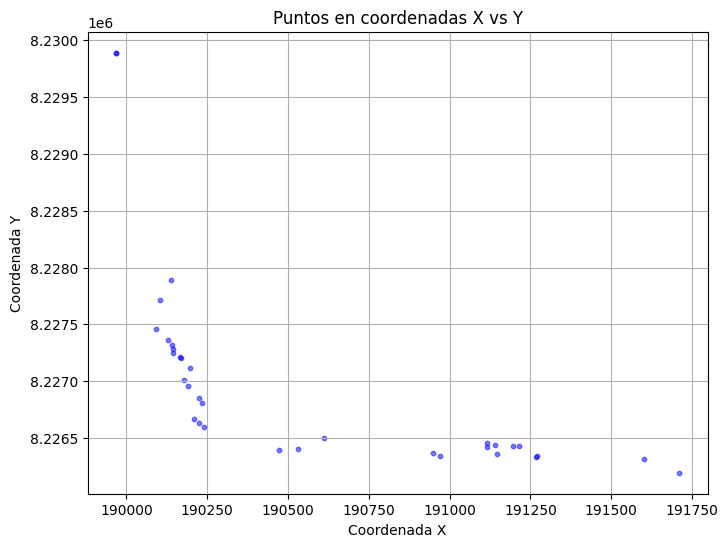

In [41]:
# Suponiendo que tu dataframe se llama df y que las columnas se llaman 'x' y 'y'
plt.figure(figsize=(8,6))  # Ajusta el tamaño de la figura a tu gusto
plt.scatter(df_union['x'], df_union['y'], s=10, c='blue', alpha=0.5)  # s: tamaño de los puntos, c: color, alpha: transparencia
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Puntos en coordenadas X vs Y')
plt.grid(True)
plt.show()

## Se guarda la data procesada en un archivo pickle

In [42]:
df_union.to_pickle(processed_data_pickle_path)

In [43]:
df_union.to_excel(processed_data_excel, index=False, header=True)